# OCT Image of Tooth Section

In [6]:
from skimage import io
import os
from skimage.color import rgb2gray
import random
import matplotlib.pyplot as plt
import numpy as np

class ImgReader:
    """
    Data Manager
    """
    def __init__(self, datafolder, img_format='.bmp'):
        self.datapath = datafolder
        self.img_format = img_format
        self.ImgPaths = self.get_all_img_paths()
    
    def get_img(self, index):
        return io.imread(self.ImgPaths[index])
    
    
    def get_all_imgs(self, filepaths=False):
        imgs = [io.imread(filename) for filename in self.ImgPaths]
        if filepaths:
            return imgs, filepaths
        else:
            return imgs
    
    def get_random_img(self, filename=False):
        ImgPath = random.choice(self.ImgPaths)
        if filename:
            return io.imread(ImgPath), ImgPath
        else:
            return io.imread(ImgPath)
    
    def get_all_img_paths(self):
        ImgPaths = []
        for dirPath, dirNames, fileNames in os.walk(self.datapath):
            for f in fileNames:
                if self.img_format in f:
                    ImgPaths.append(os.path.join(dirPath, f))
        return ImgPaths

# Datagenerator and processing the mask
- Prepare train_x, train_y
- Prepare test_x, test_y

## Mask
- First label the region
- Filter with color

## References
1. numpy.all [[link](https://docs.scipy.org/doc/numpy/reference/generated/numpy.all.html)]

Text(0.5, 1.0, 'mask')

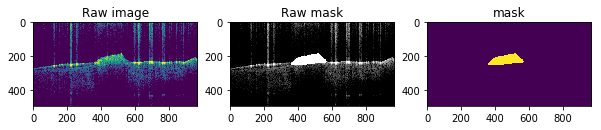

In [13]:
def get_img_mask(imgfolder, maskfolder, filtermask=True, grayimg=True):
    """
    Get Pair images from two folder
    First load images in imgfolder, then find images in maskfolder with same filenames.
    
    """
    dimg = ImgReader(imgfolder)
    dmask = ImgReader(maskfolder)
    raw_masks, maskpaths = dmask.get_all_imgs(filepaths=True)
    imgs = []
    
    for filename in dmask.ImgPaths:
        imgname = os.path.join(imgfolder, os.path.basename(filename))
        imgs.append(io.imread(imgname))
    
    if grayimg:
        imgs = [rgb2gray(img) for img in imgs]
        
    if filtermask:
        masks = [colorfilter(raw_mask) for raw_mask in raw_masks]
        return imgs, masks
    else:
        return imgs, raw_masks

def colorfilter(img, LabelColorList=[(255,255,255)]):
    imgf = np.ones((img.shape[0],img.shape[1]), dtype=bool)
    
    for c in LabelColorList:
        imgc = np.all(img ==c, axis=-1) # select color as True 
        imgf = imgf * imgc# logic AND in Numpy
    
    return imgf


# Read Folder
imgs, raw_masks = get_img_mask('test_train/img','test_train/label', 
                               filtermask=False, 
                               grayimg=True)
masks = [colorfilter(mask) for mask in raw_masks] # Filter masks

# Plotting
s = random.randint(0, len(imgs)-1)
fig, ax = plt.subplots(1,3, figsize=(10,7))
ax[0].imshow(imgs[s])
ax[1].imshow(raw_masks[s])
ax[2].imshow(masks[s])

ax[0].set_title('Raw image')
ax[1].set_title('Raw mask')
ax[2].set_title('mask')

## Display Sample Image

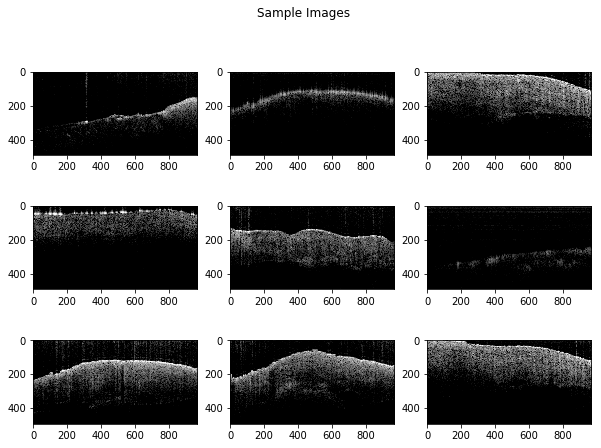

In [11]:
# Setting
sample_col, sample_row = 3, 3
datafolder = 'data'
sample_size = sample_col * sample_row

# Get sample image
dm = ImgReader(datafolder)
imgs = [dm.get_random_img() for i in range(0, sample_size) ]


# Plotting
fig, axs = plt.subplots(sample_col, sample_row, figsize=(10,7))
fig.suptitle('Sample Images')

c = 0
for i in range(0,sample_col):
    for j in range(0, sample_row):
        axs[i,j].imshow(imgs[c])
        c += 1